In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


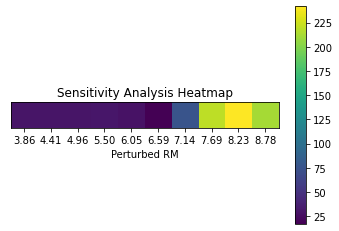

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Perform sensitivity analysis by perturbing a feature
sensitivity_feature = 'RM'  # Example: 'RM' (average number of rooms per dwelling)

# Range of perturbed values
perturbed_values = np.linspace(np.min(X_train[sensitivity_feature]), np.max(X_train[sensitivity_feature]), num=10)

# Calculate metric differences for each perturbed value
metric_differences = []
for value in perturbed_values:
    X_perturbed = X_test.copy()
    X_perturbed[sensitivity_feature] = value
    y_pred_perturbed = model.predict(X_perturbed)
    metric_difference = mean_squared_error(y_test, y_pred_perturbed) - mean_squared_error(y_test, model.predict(X_test))
    metric_differences.append(metric_difference)

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(np.array(metric_differences).reshape(1, -1), cmap='viridis')

# Customize the plot
ax.set_xticks(np.arange(len(perturbed_values)))
ax.set_xticklabels(['{:.2f}'.format(value) for value in perturbed_values])
ax.set_yticks([])
plt.xlabel(f'Perturbed {sensitivity_feature}')
plt.title('Sensitivity Analysis Heatmap')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

In [21]:
# Create and train the neural network model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)








# Predict the target variable for the test set
y_pred = mlp_model.predict(X_test)




# Create a graph
dot = Digraph()

# Add nodes for input and output layers
input_nodes = ['X1', 'X2', 'X3']
output_nodes = ['y']
dot.attr('node', shape='circle')
dot.attr('node', fixedsize='true')
dot.attr('node', width='0.5')
dot.attr('node', height='0.5')
for node in input_nodes + output_nodes:
    dot.node(node)

# Add nodes for hidden layers
dot.attr('node', shape='circle')
dot.attr('node', fixedsize='true')
dot.attr('node', width='0.5')
dot.attr('node', height='0.5')
for i, n_nodes in enumerate(mlp_model.hidden_layer_sizes):
    for j in range(n_nodes):
        dot.node(f'H{i+1}_{j+1}')

# Add edges between nodes
dot.attr('edge')
for i in range(len(input_nodes)):
    dot.edge(input_nodes[i], f'H1_{i+1}')
for i in range(len(mlp_model.hidden_layer_sizes) - 1):
    for j in range(mlp_model.hidden_layer_sizes[i]):
        for k in range(mlp_model.hidden_layer_sizes[i+1]):
            dot.edge(f'H{i+1}_{j+1}', f'H{i+2}_{k+1}')
for j in range(mlp_model.hidden_layer_sizes[-1]):
    dot.edge(f'H{len(mlp_model.hidden_layer_sizes)}_{j+1}', 'y')

# Save the graph to a file
dot.render('network_plot', format='png', view=True)



print("Neural Network Model:")
print("Number of hidden layers:", mlp_model.hidden_layer_sizes)
print("Activation function:", mlp_model.activation)
print("Solver:", mlp_model.solver)
print("Random state:", mlp_model.random_state)
print("Number of iterations:", mlp_model.n_iter_)
print("Loss:", mlp_model.loss_)
print("Learning rate:", mlp_model.learning_rate)


from keras.utils import plot_model

# Plot the network architecture
plot_model(mlp_model, to_file='network_plot.png', show_shapes=True)



# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression,LR: Actual vs Predicted')

# Annotate statistical parameters on the plot
textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

NameError: name 'Digraph' is not defined